In [12]:
# Exercise
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

df = pd.read_csv('bhp.csv')
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [6]:
# Removing outliers using percentile technique
# setting max and min thresholds

min_threshold, max_threshold = df['price_per_sqft'].quantile([0.001, 0.999])
df1 = df[(df['price_per_sqft'] < max_threshold)&(df['price_per_sqft'] > min_threshold)]
df1.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [7]:
# Removing outliers using standard deviation technique
# setting upper and lower limit for 4 standar deviation
upper_limit = df1['price_per_sqft'].mean() + 4*df1['price_per_sqft'].std()
lower_limit = df1['price_per_sqft'].mean() - 4*df1['price_per_sqft'].std()

upper_limit,lower_limit

df1['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [8]:
df2 = df1[(df1['price_per_sqft'] > lower_limit)&(df1['price_per_sqft'] < upper_limit)]
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888


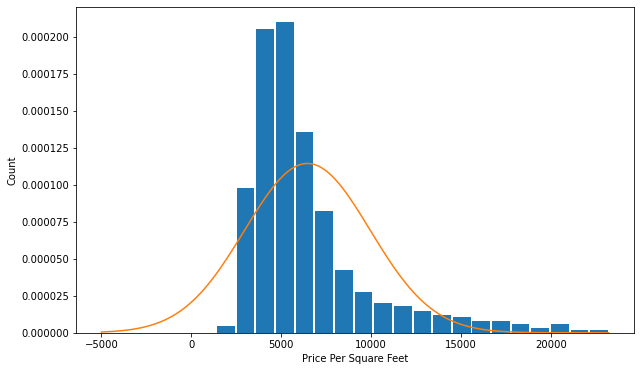

In [13]:
plt.hist(df2['price_per_sqft'], bins=20, rwidth=0.9,density=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

rng1 = np.arange(-5000, df2.price_per_sqft.max(), 100)
plt.plot(rng1, norm.pdf(rng1, df2.price_per_sqft.mean(), df2.price_per_sqft.std()))

In [60]:
# Removing oultiers using z-score technique
# creating column for z-score

df1['zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()
df1.head(10)

<ipython-input-60-80df8a5c0f58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['zscore'] = (df10.price_per_sqft - df10.price_per_sqft.mean()) / df10.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.825075
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,0.193997
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,2.781282
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.443285
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274,7.150495


In [61]:
df3 = df1[(df1.zscore < 4)&(df1.zscore > -4)]
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.825075
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,0.193997
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,2.781282
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.443285
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888,-0.670283
